<a id='top'></a>

# <h1 align="center">Research Project Neural Networks

## <h2 align = 'center'>Chess Piece Recognition


## Index

1. [Presentation](#Presentation)

2. [Introduction](#Introduction)

3. [Requirements](#Requirements)

4. [Loading the Data](#Load)    
    
5. [Running the code](#code)

6. [Conclusions](#Conclusions)

<!-- ## This code provies functionality across the whole notebook. It allows the user to navigate trough to see each part.  -->

![image.png](attachment:image.png)

<a name="Presentation"></a>

For this project, I will select a paper about a topic of deep learning reproduce its results in a Jupyter Notebook

The chosen project was: [Chessboard and Chess Piece Recognition With the Support of Neural Networks](https://arxiv.org/pdf/1708.03898v3)


Throughout this notebook, this paper will be fully explained: both its history and mathematical derivation, as well as the code needed to implement the experiments layed out in it, which will be in *python*. 

<a name="Introduction"></a>

## Article Introduction and Summary

In this paper, the author talks about a way to compute image recognition on chess pieces. After a first introduction to the board and the pieces in which the project is based, as well as an overview of some similar *computer vision* methods, the author explains how *heatmaps* are generated (and what metrics they use) in the model. The variables defined are: 


  P = max {$\sqrt{EA}$, $\frac{\sqrt{A}}{6}$}

  E = 100% - $\frac{A}{A_0}$·


> Where **E** is an error rate

> **P** is an offset value. 

> **A** is th earea of a given heat map

> **$A_0$** is the area of the entire image.


Later, some methods are introduced. They thoroughly explained in the following pages. The authors go into detail about how they operate and several other things, such as their *computational complexity* $O(n^3), O(n^2)$, etc...

* `Straight Line Detector`: Finds straight lines in an image and filter out lines that are expected to have no usability. It consists of three main steps: 
**Boosting**: Find all possible segments using multiple analysis, **Grouping**: separate segments into groups of collinear segments. There are some calculations involved that allow us to decide if two lines should be merged. **Merging**: Analyze and merge the segments in each group. It converts segments to points and then fits a straight line to all points.

* `Lattice points search`: Selects modules that have a higher probability of being lattice points. There are several steps involved with it: **geometric** and **neural** detectors (which are given a matrix and perform analysis).

* `Chessboard position search`: It computes a heat map representing the probability that a chessboard is located in a specific sub-area of an image. It integrates the method just talked about and used a *rather complicated* scoring function, called **polyscore** which outputs the probability of the image being a chessboard.

* `Forsyth-Edwards Notation generation`: The algorithm proceed to recognizing chess pieces located on the chessboard. It uses some metrics to obtain good results, like utilizing a *chess engine* to check for the probability of piece configurations of clustering into different groups. It also considers *phyisical properties* of the pieces. 

Lastly, the $Results$ are introduced, comparing the scores it obtained, as well as the time it took.

This paper was chosen due to the fact that I am interested in chess, and I find this to be a rather fascinating topic. 

<a name="Requirements"></a>

## Requirements

The code for this project was created using the following libraries:

$keras$

$tensorflow$

$scipy$

$pyclipper$


These should be installed by running the following command on a terminal: 

`pip install -r requirements.txt`

After this step, we can proceed in different ways: 

> As we it can be seen on the *Readme.md* file, we can run the python code in the **Terminal**. With this approach, we would run commands like `dataset.py` or `mian.py` (as it is explained in the github)

> The other option is to upload the file locally and run the code in a notebook. (The whole purpose of this lab)

First, I ran the code on the terminal to check that it in fact worked, and afterwards I proceeded to implement a notebook with the code.


<a name="Load"></a>

## Load the data

After having the correct setup, we begin by loading the data by creating a *mount* at a specified folder.

I will somewhat modify the code given, to adapt it better and be able to run it. Some errors came up when running the code, but in this lab I fixed them, and provided some examples of how to run this code.


## Unzip the files and refresh

The first step we take (if we are on *google colab* is to load the data into the folder). We will upload the *.zips* provided. Later, we will unzip them in the folder, and refresh the page to load them

(If we are running locally, we can just load the data and skip the next cell)

In [1]:
from zipfile import ZipFile
file_names = ['data.zip', 'deps.zip', 'docs.zip', 'test.zip', '__pycache__.zip']

for file_name in file_names:
  with ZipFile(file_name, 'r') as zip:
    zip.extractall()


In [4]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Import data

Now it is time to import the different modules.

In [5]:
import dataset

train data: 10/9664
train data: 20/9664
train data: 30/9664
train data: 40/9664
train data: 50/9664
train data: 60/9664
train data: 70/9664
train data: 80/9664
train data: 90/9664
train data: 100/9664
train data: 110/9664
train data: 120/9664
train data: 130/9664
train data: 140/9664
train data: 150/9664
train data: 160/9664
train data: 170/9664
train data: 180/9664
train data: 190/9664
train data: 200/9664
train data: 210/9664
train data: 220/9664
train data: 230/9664
train data: 240/9664
train data: 250/9664
train data: 260/9664
train data: 270/9664
train data: 280/9664
train data: 290/9664
train data: 300/9664
train data: 310/9664
train data: 320/9664
train data: 330/9664
train data: 340/9664
train data: 350/9664
train data: 360/9664
train data: 370/9664
train data: 380/9664
train data: 390/9664
train data: 400/9664
train data: 410/9664
train data: 420/9664
train data: 430/9664
train data: 440/9664
train data: 450/9664
train data: 460/9664
train data: 470/9664
train data: 480/9664
t

In [8]:
from train import *

# we will use the following function to read a dataset, given a name

def read_dataset(name):
    global NC_PATH_DATASET
    path = NC_PATH_DATASET + "{}.h5".format(name)
    print(path)
    h5f = h5py.File(path, 'r', driver='core')
    X, Y = h5f['data'], h5f['labels']
    X = X[()].reshape([-1, 21, 21, 1])
    Y = Y[()].reshape([-1, 2])
    return (X, Y)

# this function reads the data on data/train

read_dataset('laps')[0:1]

---- FASTEN YOUR SEATBELTS -----
If it's slow, compile protobuf and tensorflow from source!
[FIXME]: only LAPS model is supported
data/train/laps.h5


(array([[[[0],
          [0],
          [0],
          ...,
          [0],
          [0],
          [0]],
 
         [[0],
          [0],
          [0],
          ...,
          [0],
          [0],
          [0]],
 
         [[0],
          [0],
          [0],
          ...,
          [0],
          [0],
          [0]],
 
         ...,
 
         [[0],
          [0],
          [0],
          ...,
          [0],
          [0],
          [0]],
 
         [[0],
          [0],
          [0],
          ...,
          [0],
          [0],
          [0]],
 
         [[0],
          [0],
          [0],
          ...,
          [0],
          [0],
          [0]]],
 
 
        [[[0],
          [0],
          [0],
          ...,
          [0],
          [0],
          [0]],
 
         [[0],
          [0],
          [0],
          ...,
          [0],
          [0],
          [0]],
 
         [[1],
          [1],
          [1],
          ...,
          [1],
          [0],
          [0]],
 
         

Now, we will train the model.

It will take a long time because we are analyzing a lot of images.

In [9]:
import sys

NAME = 'LAPS'.upper()

model = load_model(NAME)
model

NAME = NAME.lower()

X, Y = read_dataset(NAME)
print(X.shape, Y.shape)

# when we have our X and Y matrices, we will train the model using the 
# train_network function. The default value is 50, but 15 or 20 is more than enough.

train_network(model, X, Y, n = 15)

# In the model I only trained for 1 epoch, due to time. Sorry for the inconvenience!!

data/train/laps.h5
(9664, 21, 21, 1) (9664, 2)
151/151 [==============================] - 124s 812ms/step - loss: 0.7784 - categorical_accuracy: 0.4988
FINAL 0.25479093


After we have trained our model, we will save it. It will be saved at the **data/models** folder. It will have the name *laps_new.h5*

In [10]:
def save_model(name):
	global NC_PATH_MODELS
	save_path = NC_PATH_MODELS + '{}.h5'.format(name.lower())
	model.save(save_path)
	save_model = NC_PATH_MODELS + '{}.model.json'.format(name.lower())
	with open(save_model, "w") as json_file:
		json_file.write(model.to_json())
	save_weights = NC_PATH_MODELS + '{}.weights.h5'.format(name.lower())
	model.save_weights(save_weights)

NAME = f'{NAME}_new'

save_model(NAME) 


In [11]:
! pip install pyclipper

In [12]:
import main

<<<  neural-chessboard  >>>


In [13]:
import utils

## Visualize the images

The following cells will allow us to see the data we are working with.

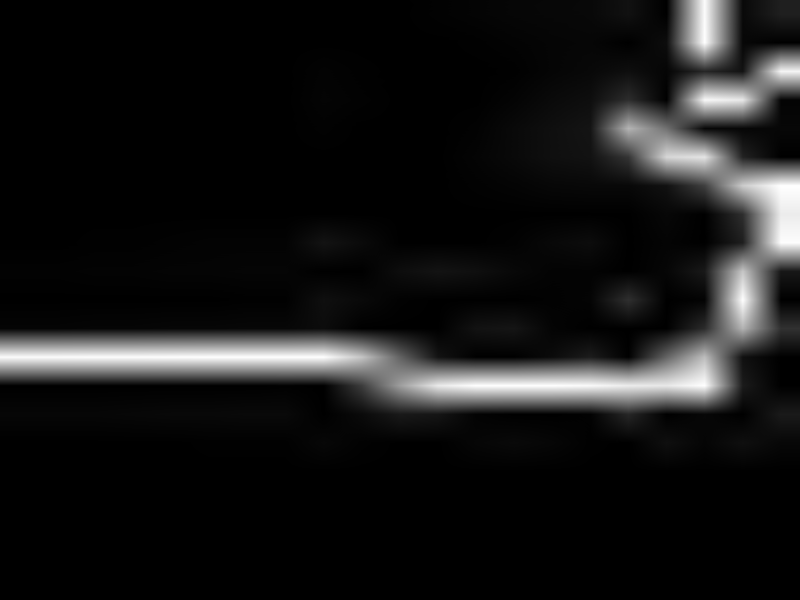

In [14]:
import os
from utils import ImageObject

photo = os.getcwd() + '/data/train/laps/no/-14220771171646160_90.jpg'

import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread(photo) 
cv2_imshow(cv2.resize(img, (800, 600)))

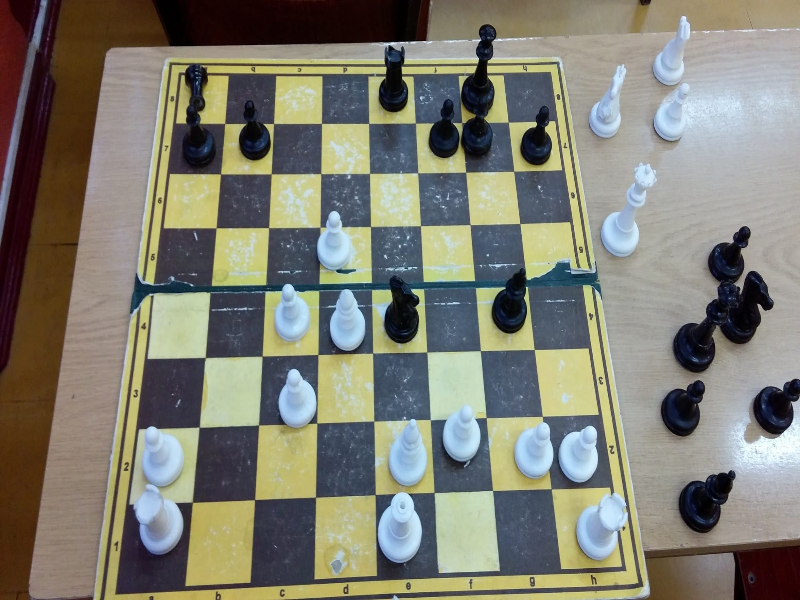

In [15]:
board = os.getcwd() + '/test/in/3.jpg'

img_board = cv2.imread(board) 
cv2_imshow(cv2.resize(img_board, (800, 600)))

It is clear to see that we are working with a set of *train data*: pieces, as well as some *testing data*: different boards.

Testing the model

In [16]:
import main
from main import *
import utils

# we will try to obtain the default
global columns
try:
  rows, columns = os.popen('stty size', 'r').read().split()
except:
  rows=80;columns=80

NAME = 'LAPS'.upper()

model = load_model(NAME)

# we will load some function from main.py and laps.py that returned some issues.

def test(input_val, output_val):
	files = glob.glob('test/in/*.jpg')
	for iname in files:
		oname = iname.replace('in', 'out')
		input_val = iname; output_val = oname
		detect(input_val, output_val)
	print("TEST: %d images" % len(files))
 
# for this function, I set the parameter p equal to False so as to not 
# print the values all the time when testing.
def detect(input_val, output_val, p = False):
    global NC_LAYER, NC_IMAGE, NC_CONFIG

    if (not os.path.isfile(input_val)):
      utils.errn("error: the file \"%s\" does not exits" % input_val)

    NC_IMAGE, NC_LAYER = ImageObject(load(input_val)), 0
    for _ in range(NC_CONFIG['layers']):
      NC_LAYER += 1; 
    if p:
      layer()
    save(input_val, NC_IMAGE['orig'])

    print("DETECT: %s" % input_val)

def ribb(*msg, sep='-'):
	msg = ' '.join(msg)
	return msg + sep * int(int(columns) - len(__strip_ansi(msg)))


def layer():
    global NC_LAYER, NC_IMAGE#, NC_SCORE

    print(utils.ribb("==", sep="="))
    print(utils.ribb("[%d] LAYER " % NC_LAYER, sep="="))
    print(utils.ribb("==", sep="="), "\n")

    # --- 1 step --- find all possible lines (that makes sense) ----------------
    print(utils.ribb(utils.head("SLID"), utils.clock(), "--- 1 step "))
    segments = pSLID(NC_IMAGE['main'])
    raw_lines = SLID(NC_IMAGE['main'], segments)
    lines = slid_tendency(raw_lines)

    # --- 2 step --- find interesting intersections (potentially a mesh grid) --
    print(utils.ribb(utils.head("LAPS"), utils.clock(), "--- 2 step "))
    
    points = LAPS(NC_IMAGE['main'], lines)
    
    # --- 3 step --- last layer reproduction (for chessboard corners) ----------
    print(utils.ribb(utils.head(" LLR"), utils.clock(), "--- 3 step "))
    inner_points = LLR(NC_IMAGE['main'], points, lines)
    four_points = llr_pad(inner_points, NC_IMAGE['main']) # padcrop

    # --- 4 step --- preparation for next layer (deep analysis) ----------------
    print(utils.ribb(utils.head("   *"), utils.clock(), "--- 4 step "))
    print(four_points)
    try: NC_IMAGE.crop(four_points)
    except:
      utils.warn("niestety, ale kolejna warstwa nie jest potrzebna")
      NC_IMAGE.crop(inner_points)

    print("\n")

test(model.input, model.output)

DETECT: test/in/cc8.jpg
DETECT: test/in/14.jpg
DETECT: test/in/13.jpg
DETECT: test/in/12.jpg
DETECT: test/in/2.jpg
DETECT: test/in/cc3.jpg
DETECT: test/in/cc4.jpg
DETECT: test/in/1.jpg
DETECT: test/in/17.jpg
DETECT: test/in/cc5.jpg
DETECT: test/in/19.jpg
DETECT: test/in/5.jpg
DETECT: test/in/8.jpg
DETECT: test/in/16.jpg
DETECT: test/in/7.jpg
DETECT: test/in/11.jpg
DETECT: test/in/15.jpg
DETECT: test/in/10.jpg
DETECT: test/in/9.jpg
DETECT: test/in/6.jpg
DETECT: test/in/cc10.jpg
DETECT: test/in/cc9.jpg
DETECT: test/in/cc7.jpg
DETECT: test/in/3.jpg
DETECT: test/in/cc2.jpg
DETECT: test/in/cc6.jpg
DETECT: test/in/18.jpg
DETECT: test/in/20.jpg
DETECT: test/in/4.jpg
DETECT: test/in/cc1.jpg
TEST: 30 images


In [17]:
# we will test the model to see how it works!!

board = os.getcwd() + '/test/in/1.jpg'
photo = os.getcwd() + '/data/train/laps/no/-14220771171646160_90.jpg'

detect(photo, board, p = True)

[3] LAYER ======================================================================

 SLID  (  15.592)s --- 1 step --------------------------------------------------
--> @pSLID(img)
FILTER: 1 [3, (2, 6), 5] : 17
FILTER: 2 [3, (6, 2), 5] : 34
FILTER: 3 [5, (3, 3), 5] : 9
FILTER: 4 [0, (0, 0), 0] : 346
--> @SLID(img, segments)
--> @slid_tendency(raw_lines)
 LAPS  (   19.88)s --- 2 step --------------------------------------------------
--> @LAPS(img, lines)
  LLR  ( 206.041)s --- 3 step --------------------------------------------------
--> @LLR(img, points, lines)
[-1 -1 -1 -1 -1 -1]
19.434085352014584 0.30000000000000004 (329.0, 231.5)
6487.119674852402 5 | 148000.0 1.9203945056416913 2.290415225011767 | 3.898450791692785 17.890290662814845
12867.479975313468 6 | 162250.0 1.957404980892837 1.954615779213381 | 5.265484007849607 4.756574397610112
4229.142079450884 5 | 231750.0 1.2875761451872383 2.137053202128963 | 0.11891279251595867 9.503288904374106
4229.142079450884 5 | 231750.0 1.28757

<a name="Conclusions"></a>

## Conclusions

This project has allowed me to understand some of the applications of *Neural Networks* that i had not considered before. It has broaden my idea to the real usage of *Deep Learning*. 

The *python* code in the lab is quite clear, I hope in the future, I can write code as well-structured as the one found here.

Chess is a game I quite enjoy, and I am really interested in all the **AI** applications related to it. I looked for some algorithms to learn it, but they were too complicated for this project, that is why I chose a project related to chess, but not as complicated. 
